In [8]:
import pandas as pd

# Load the CSV file with a different encoding to handle non-UTF-8 characters
file_path = 'injury_history(player_sessions).csv'
new_csv_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataframe
print(new_csv_data.head())

            name  playerid  groupid groupname  leagueid  sessionid  \
0  Anthony Lopez       112      212   Group 1       301       1001   
1  Anthony Lopez       112      212   Group 1       301       1002   
2  Anthony Lopez       112      212   Group 1       301       1003   
3  Anthony Lopez       112      212   Group 1       301       1004   
4  Anthony Lopez       112      212   Group 1       301       1005   

  session_date position  distancemi  distanceminmi  ...  heartrateminbpm  \
0   2023-01-01   Center        4.58           0.12  ...               74   
1   2023-01-03   Center        1.18           0.11  ...               62   
2   2023-01-04   Center        5.59           0.14  ...               78   
3   2023-01-06   Center        3.22           0.09  ...               64   
4   2023-01-07   Center        2.19           0.10  ...               62   

   heartratemaxbpm  humancoretemperaturef  humancoretemperaturemaxf  trimp  \
0              198                  99.47   

## Preprocessing and statistics of the session data

In [9]:
# Standardize column names by replacing special characters and spaces for easier access
new_csv_data.columns = (
    new_csv_data.columns.str.replace(r"[^\w\s]", "", regex=True)
                       .str.replace(" ", "_")
                       .str.lower()
)

# Convert the session_date column to datetime format for time-based analysis
new_csv_data['session_date'] = pd.to_datetime(new_csv_data['session_date'], errors='coerce')

# Remove non-ASCII characters in column names and string columns
new_csv_data.columns = new_csv_data.columns.str.encode('ascii', 'ignore').str.decode('ascii')
for col in new_csv_data.select_dtypes(include=['object']).columns:
    new_csv_data[col] = new_csv_data[col].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii') if isinstance(x, str) else x)

# Display summary statistics for numerical columns
summary_stats = new_csv_data.describe()
print("Summary Statistics:")
print(summary_stats)

# Check for missing values in the dataset
missing_values = new_csv_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

new_csv_data.head()



Summary Statistics:
          playerid      groupid  leagueid    sessionid  \
count  2604.000000  2604.000000    2604.0  2604.000000   
mean    107.194700   207.025730     301.0  1108.374424   
min     101.000000   201.000000     301.0  1001.000000   
25%     104.000000   204.000000     301.0  1056.000000   
50%     107.000000   207.000000     301.0  1105.500000   
75%     110.000000   210.000000     301.0  1162.000000   
max     115.000000   215.000000     301.0  1220.000000   
std       4.033774     3.823381       0.0    62.143020   

                        session_date   distancemi  distanceminmi    durations  \
count                           2604  2604.000000    2604.000000  2604.000000   
mean   2023-06-21 11:28:28.755760384     3.513122       0.100031  5400.809524   
min              2023-01-01 00:00:00     1.000000       0.050000  3610.000000   
25%              2023-03-30 00:00:00     2.280000       0.080000  4548.000000   
50%              2023-06-12 12:00:00     3.560000   

,name,playerid,groupid,groupname,leagueid,sessionid,session_date,position,distancemi,distanceminmi,...,heartrateminbpm,heartratemaxbpm,humancoretemperaturef,humancoretemperaturemaxf,trimp,heartraterecoveries,jumpheightmaxft,changesoforientation,exertions,diskusage
0,Anthony Lopez,112,212,Group 1,301,1001,2023-01-01,Center,4.58,0.12,...,74,198,99.47,101.24,261,5,2.31,229,307,58.56
1,Anthony Lopez,112,212,Group 1,301,1002,2023-01-03,Center,1.18,0.11,...,62,179,99.56,99.33,270,6,2.44,427,180,44.93
2,Anthony Lopez,112,212,Group 1,301,1003,2023-01-04,Center,5.59,0.14,...,78,172,100.06,102.31,149,4,3.04,383,440,15.32
3,Anthony Lopez,112,212,Group 1,301,1004,2023-01-06,Center,3.22,0.09,...,64,186,100.45,101.10,180,10,3.17,462,450,21.46
4,Anthony Lopez,112,212,Group 1,301,1005,2023-01-07,Center,2.19,0.10,...,62,146,98.73,100.91,152,4,1.28,118,416,20.51


In [ ]:
#new_csv_data.to_csv(file_path, index=False)

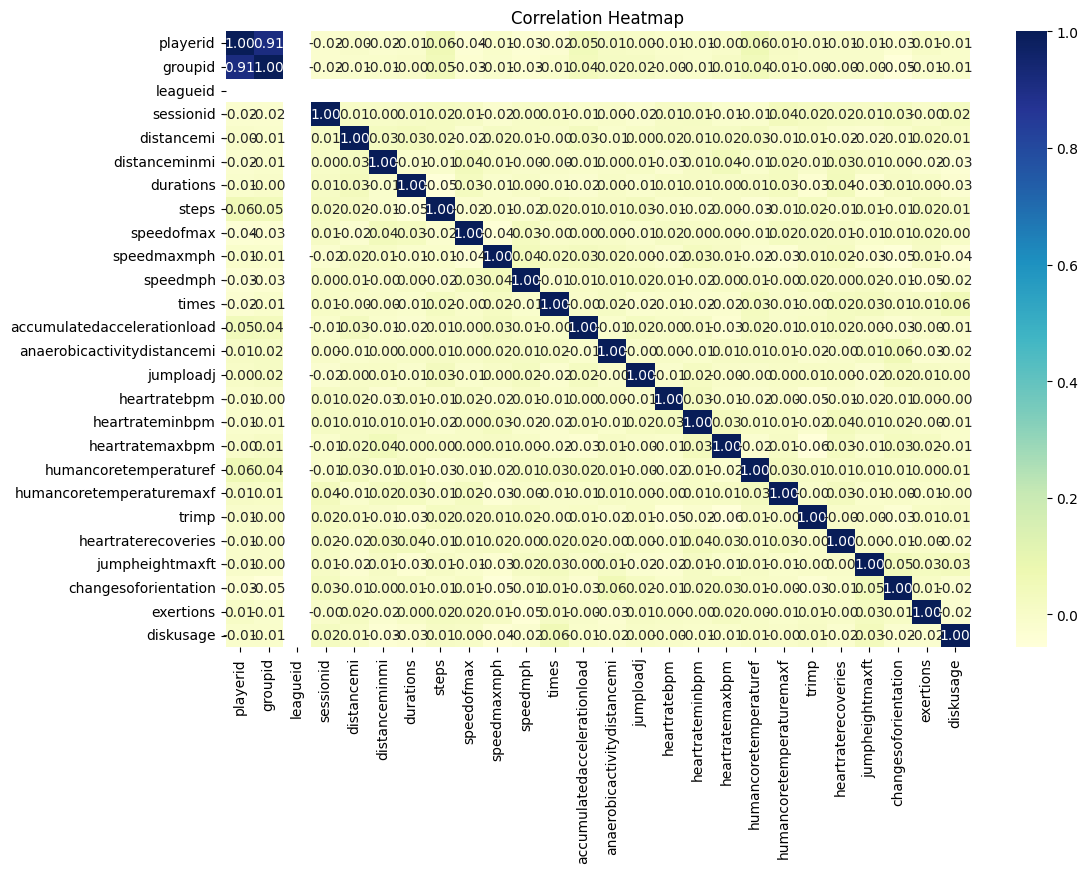

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns for summary statistics and correlation analysis
numeric_data = new_csv_data.select_dtypes(include=['float64', 'int64'])

# 2. Correlation Heatmap for numeric columns only
plt.figure(figsize=(12, 8))
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


## Exploratory data analysis for player sessions

/tmp/ipykernel_10977/3105086159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette="viridis")


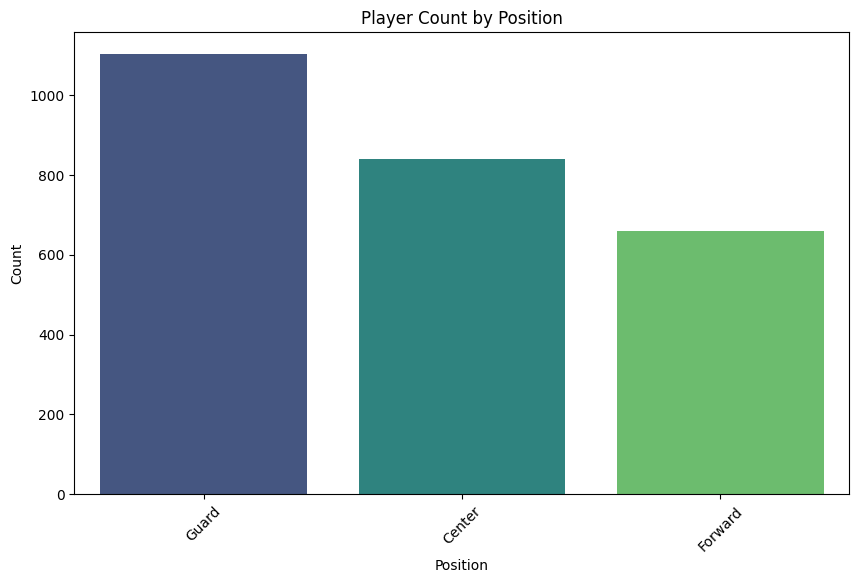

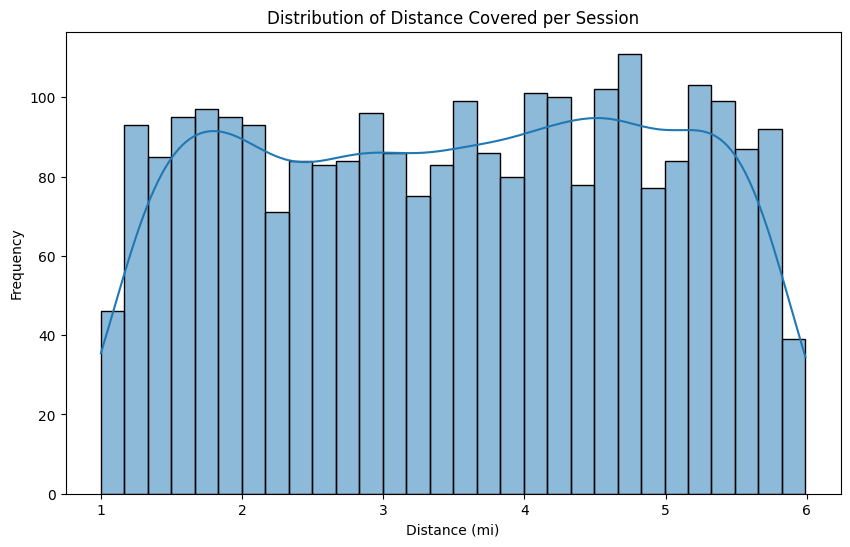

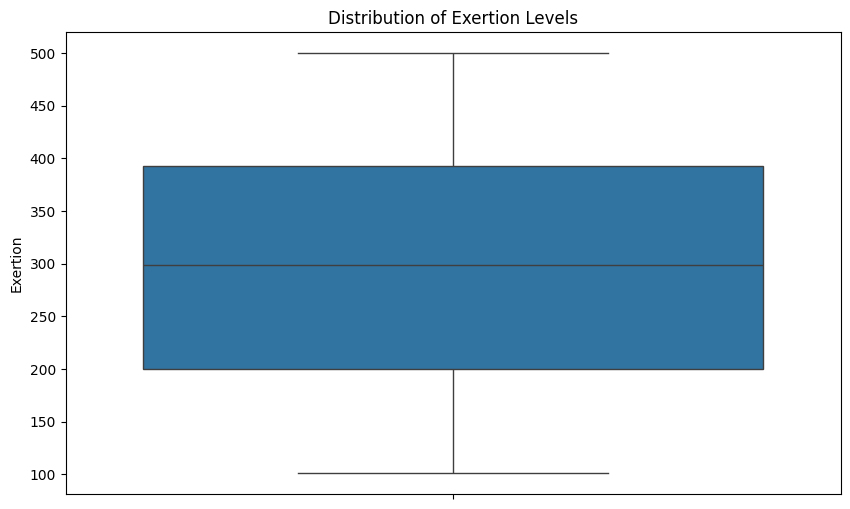

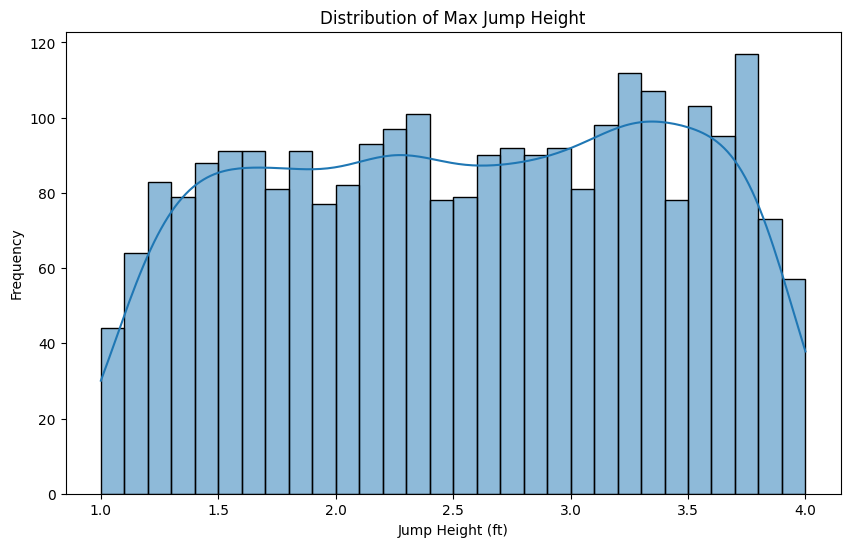

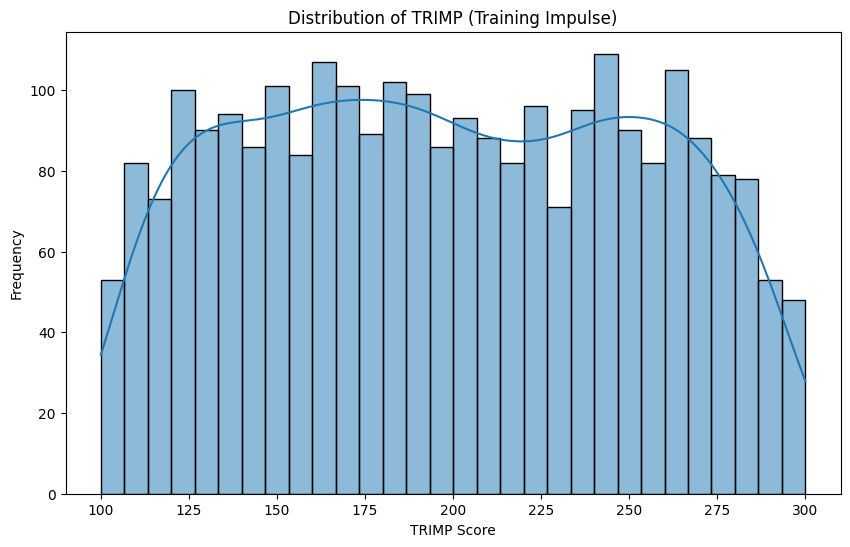

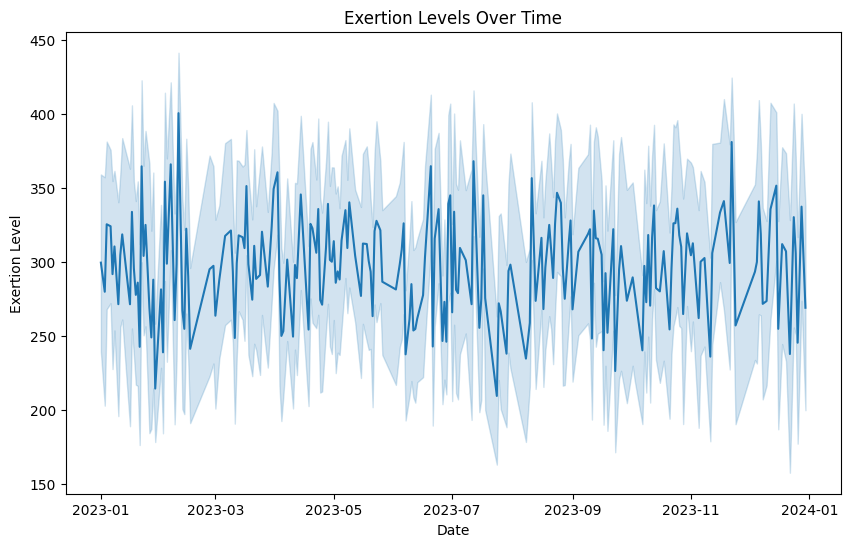

In [11]:
position_counts = new_csv_data['position'].value_counts()

# Plot a bar chart for player counts by position
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette="viridis")
plt.title('Player Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(new_csv_data['distancemi'], bins=30, kde=True)
plt.title('Distribution of Distance Covered per Session')
plt.xlabel('Distance (mi)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=new_csv_data, y='exertions')
plt.title('Distribution of Exertion Levels')
plt.ylabel('Exertion')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(new_csv_data['jumpheightmaxft'], bins=30, kde=True)
plt.title('Distribution of Max Jump Height')
plt.xlabel('Jump Height (ft)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(new_csv_data['trimp'], bins=30, kde=True)
plt.title('Distribution of TRIMP (Training Impulse)')
plt.xlabel('TRIMP Score')
plt.ylabel('Frequency')
plt.show()

new_csv_data['Session_Date'] = pd.to_datetime(new_csv_data['session_date'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_csv_data, x='session_date', y='exertions')
plt.title('Exertion Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Exertion Level')
plt.show()


Preprocessing complete. Here is a preview of the cleaned dataset:
            name  playerid   groupid  leagueid  sessionid session_date  \
0  Anthony Lopez  1.191495  1.301264       0.0  -1.728192   2023-01-01   
1  Anthony Lopez  1.191495  1.301264       0.0  -1.712097   2023-01-03   
2  Anthony Lopez  1.191495  1.301264       0.0  -1.696002   2023-01-04   
3  Anthony Lopez  1.191495  1.301264       0.0  -1.679907   2023-01-06   
4  Anthony Lopez  1.191495  1.301264       0.0  -1.663812   2023-01-07   

   distancemi  distanceminmi  durations     steps  ...  exertions  diskusage  \
0    0.760680       0.723529   0.258607 -0.652919  ...   0.086752   0.376655   
1   -1.663508       0.361208  -0.250180  0.988211  ...  -1.049250  -0.123369   
2    1.480807       1.448172   1.443097 -0.781718  ...   1.276424  -1.209628   
3   -0.208995      -0.363434   0.775439 -0.026872  ...   1.365873  -0.984378   
4   -0.943381      -0.001113   1.216858 -0.728404  ...   1.061747  -1.019230   

   Sessi

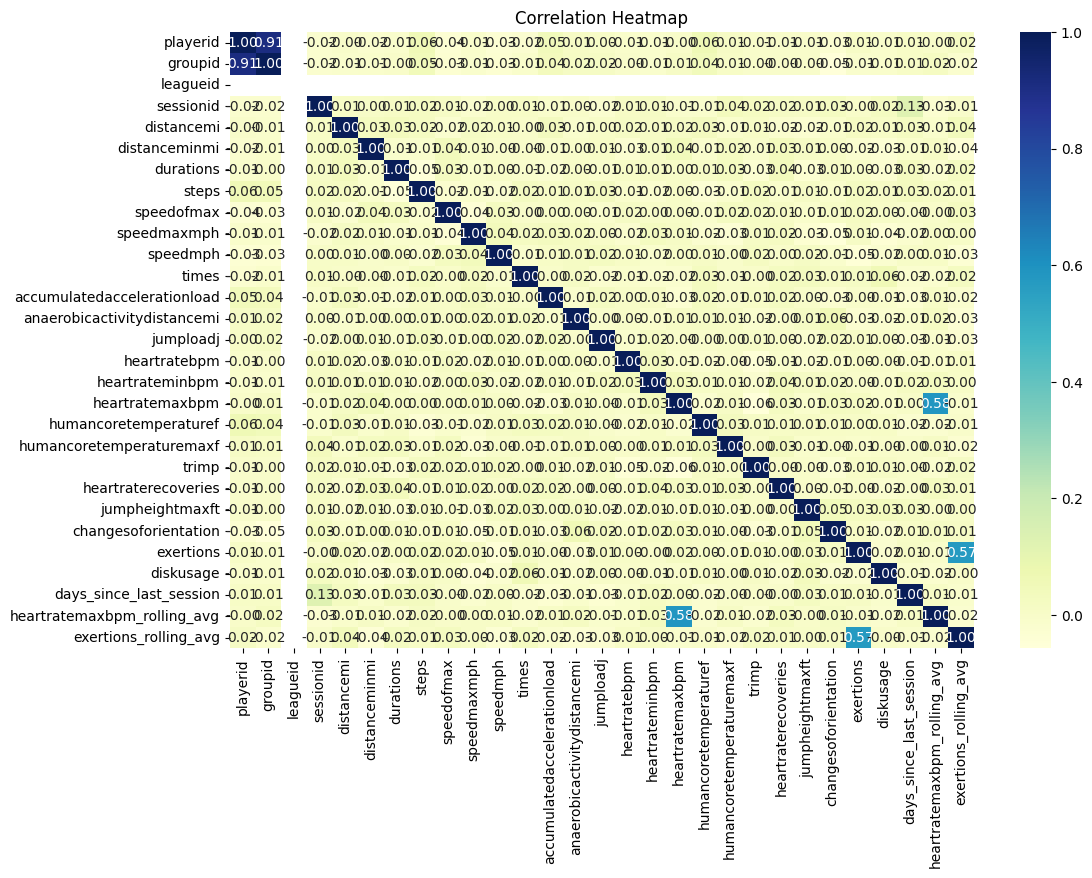

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# 1. Handle Missing Values
# Impute numeric columns with mean
numeric_cols = new_csv_data.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
new_csv_data[numeric_cols] = num_imputer.fit_transform(new_csv_data[numeric_cols])

# Impute categorical columns with most frequent value
categorical_cols = new_csv_data.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
new_csv_data[categorical_cols] = cat_imputer.fit_transform(new_csv_data[categorical_cols])

# 2. Encode Categorical Features with One-Hot Encoding
categorical_features = ['position', 'groupname']  # Adjust based on actual column names
new_csv_data = pd.get_dummies(new_csv_data, columns=['position', 'groupname'], drop_first=True)

# 3. Feature Scaling for Numeric Data
scaler = StandardScaler()
new_csv_data[numeric_cols] = scaler.fit_transform(new_csv_data[numeric_cols])

# 4. Time-based Features
# Convert session_date to datetime and extract features
new_csv_data['session_date'] = pd.to_datetime(new_csv_data['session_date'], errors='coerce')
new_csv_data['day_of_week'] = new_csv_data['session_date'].dt.dayofweek
new_csv_data['month'] = new_csv_data['session_date'].dt.month

# Calculate days since the last session (fill NA with 0 for the first entry)
new_csv_data['days_since_last_session'] = new_csv_data['session_date'].diff().dt.days.fillna(0)

# Optional: Add rolling averages for key metrics (example for heart rate and exertions)
rolling_window = 3  # Change as needed
for col in ['heartratemaxbpm', 'exertions']:  # Adjust based on actual column names
    new_csv_data[f'{col}_rolling_avg'] = new_csv_data[col].rolling(window=rolling_window, min_periods=1).mean()

# 5. Outlier Handling (Capping at 3 standard deviations)
for col in numeric_cols:
    new_csv_data[col] = np.where(
        np.abs((new_csv_data[col] - new_csv_data[col].mean()) / new_csv_data[col].std()) > 3,
        new_csv_data[col].mean() + 3 * new_csv_data[col].std() * np.sign(new_csv_data[col] - new_csv_data[col].mean()),
        new_csv_data[col]
    )

# Drop any columns not required for modeling if necessary
#new_csv_data = new_csv_data.drop(columns=['session_date'])  # Optional, drop if not needed

# Final processed data preview
print("Preprocessing complete. Here is a preview of the cleaned dataset:")
print(new_csv_data.head())

# Select only numeric columns for summary statistics and correlation analysis
numeric_data = new_csv_data.select_dtypes(include=['float64', 'int64'])

# 6. Correlation Heatmap for numeric columns only
plt.figure(figsize=(12, 8))
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

# Heart rate max bpm and exertions are correlated.